In [1]:
# Source: http://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html

%matplotlib inline
from sklearn.datasets import load_breast_cancer # this is real observational data based on various factors, decied by experts either there is cancer or not. 
import matplotlib.pyplot as plt
#moving average in pandas->http://chrisalbon.com/python/pandas_moving_average.html

In [2]:
cancer = load_breast_cancer()

In [3]:
type(cancer)

sklearn.datasets.base.Bunch

In [4]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [6]:
print cancer['target_names'] # what is the meaning of malignant and benign?

['malignant' 'benign']


In [9]:
cancer['data'] # what is data?

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [38]:
cancer['DESCR'] # this is description, about the images of breast cancer.

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [39]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [ ]:
cancer['target'] # based on various factors, 1 represent cancer and 0 not-cancer

In [41]:
cancer['data'].shape # how to slice this array?
data_list = cancer['data'].tolist()
len(data_list)

569

In [42]:
target_list = cancer['target'].tolist()
len(target_list)

569

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = cancer['data'] # what is data? 
Y = cancer['target'] # target is yes/no(0,1) something like will cancer be there or not
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [45]:
X_train.shape,Y_train.shape

((426, 30), (426,))

In [46]:
X_test.shape,Y_test.shape

((143, 30), (143,))

## Data Normlizatoin / Data Scaling(Automatic), Note:learn about mannual techniques

In [47]:
from sklearn.preprocessing import StandardScaler

# it is great to normalize training set as well to get better results
#scaler = StandardScaler()
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data

# what is data-Scaling and how we should use it,,

scaler.fit(X_train)

# why we have fitted only X_train here and not any other stuff?


StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
# now Why we have used .transform function to Y_train and Y_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling(Let's Apply 'Neural Network' to Our data and models) ooohaaaa ohhaa ohhaaahaah

In [49]:
from sklearn.neural_network import MLPClassifier

In [60]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
#dir(mlp)
mlp.learning_rate
#activation,alpha','batch_size','beta_1','beta_2','early_stopping','epsilon', 'fit','get_params','hidden_layer_sizes','learning_rate
# need to learn much more about MLPClassifier
# as well as relu activations

'constant'

In [73]:
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
predictions = mlp.predict(X_test) # now we will compare results with Y_test

## How correcet our Predictions are?(Classification)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix 

# What is the significance of classification_report and confusion_matrix?

In [76]:
confusion_matrix(Y_test,predictions)

array([[37, 20],
       [ 1, 85]])

In [77]:
print classification_report(Y_test,predictions)
# What is the significance or precision,recall,f1-score,support

             precision    recall  f1-score   support

          0       0.97      0.65      0.78        57
          1       0.81      0.99      0.89        86

avg / total       0.87      0.85      0.85       143



Our model is 87% correcet


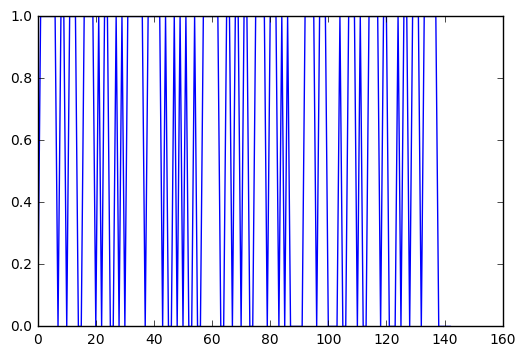

In [80]:
print "Our model is 87% correcet"
plt.plot(Y_test)

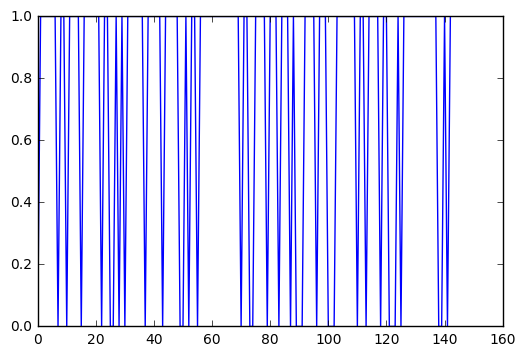

In [81]:
plt.plot(predictions)

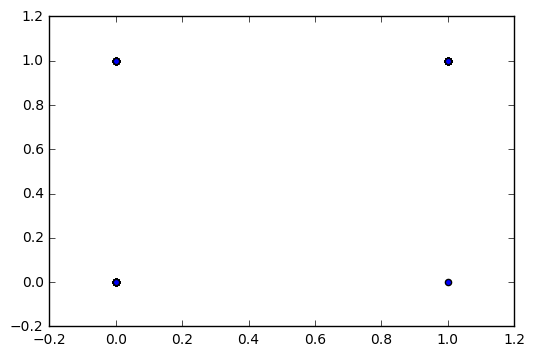

In [87]:
plt.scatter(Y_test,predictions) # bazingaaaa :D this is lie..
# How to plot bianry data on matplotlib?

# Activity

1. Somehow calculate that either stock price is going up or low, then use neural to predict that, based on
open,high,low,close vs (Close price going up or down)

2. There are still many questions that how cancer['data'] is generated and based on 
which Medical+Statistical results such thing is considered? ? ? ? ? If you are able to understand that
you will be like GOD!!


## Activity
how to see whole data_set of Scikit_learn like a pandas Data_frame?

#Tip: try to make a new DataFrame

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = 

SyntaxError: invalid syntax (<ipython-input-20-fc47449b3d9b>, line 1)